<a href="https://colab.research.google.com/github/dtoralg/IE_Calidad_ML/blob/main/Ejercicios/Modulo%205/Modulo_5_Ejercicio_4_Early_Stopping_RandomForest_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ejercicio 4: Regularización y Early Stopping con Random Forest — una simulación guiada**
**Explora cómo monitorear el sobreajuste y aplicar lógica de parada anticipada en Random Forest**

### **Introducción**
En este ejercicio vamos a explorar cómo los hiperparámetros de un modelo complejo como **Random Forest** pueden actuar como herramientas de **regularización**.

Simularemos un proceso de entrenamiento iterativo donde se evalúa el rendimiento del modelo conforme aumenta el número de árboles (`n_estimators`) y se ajustan otros parámetros como `max_depth` y `min_samples_leaf`.
El objetivo será aprender a **monitorizar** métricas como el **F1 Macro Score** y aplicar una lógica de **early stopping** manual basada en los resultados de validación cruzada.

In [1]:
# Celda 1: Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
sns.set(style='whitegrid')

In [2]:
# Celda 2: Cargar dataset y mostrar primeras filas
url = 'https://github.com/dtoralg/IE_Calidad_ML/raw/main/Data/defectos_productos.csv'
df = pd.read_csv(url)
df.head()

,ID_producto,Voltaje_prueba,Corriente_operacion,Temperatura_ambiente,Tiempo_prueba,Frecuencia_trabajo,Material_encapsulado,Proveedor,Defecto
0,1,9.150115,4.742518,25.530115,2.994613,63.985466,Plástico,Z,Mal ensamblado
1,2,10.008079,3.499830,27.452935,31.319903,1491.344155,Cerámica,Z,Mal ensamblado
2,3,7.962450,3.179779,23.636370,30.547971,4157.623317,Plástico,Z,Sin defecto
3,4,3.475670,0.735378,17.409543,56.466100,4843.639813,Cerámica,Z,Sobrecalentamiento
4,5,4.902504,4.343243,26.302373,43.660205,713.642966,Plástico,Y,Sobrecalentamiento


In [3]:
# Celda 3: Preprocesamiento de variables categóricas
df = pd.get_dummies(df, columns=['Material_encapsulado', 'Proveedor'], drop_first=True)

In [4]:
# Celda 4: Separar variables predictoras y target
X = df.drop(columns=['ID_producto', 'Defecto'])
y = df['Defecto']

In [5]:
# Celda 5: Imputación de valores y escalado
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [6]:
# Celda 6: Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [7]:
# Celda 7: Evaluar rendimiento en validación cruzada aumentando n_estimators
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

n_estimators_range = range(10, 210, 10)
f1_scores = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, max_depth=10, min_samples_leaf=3, random_state=42)
    scores = cross_val_score(rf, X_train, y_train, cv=skf, scoring='f1_macro')
    f1_scores.append(scores.mean())

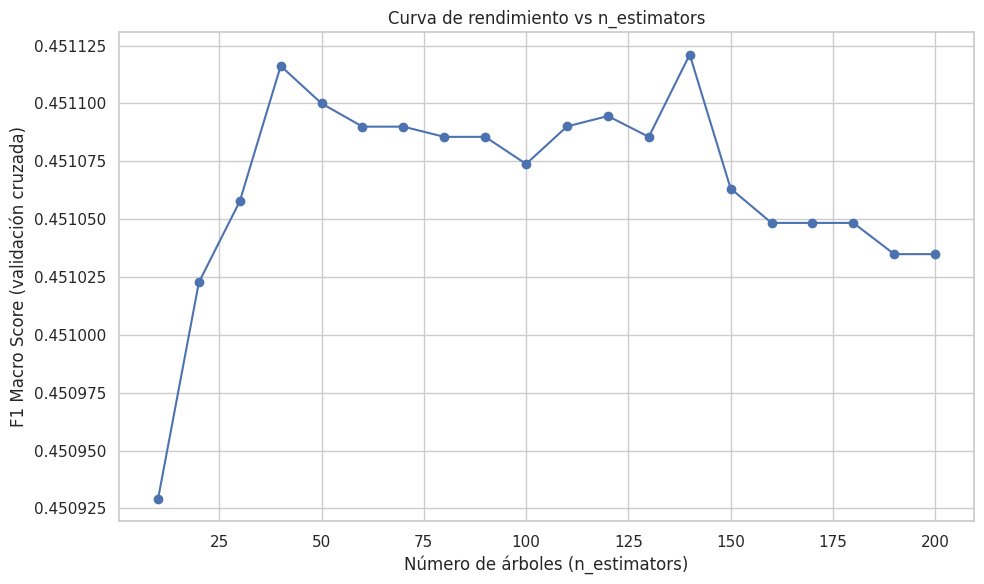

In [8]:
# Celda 8: Visualización del rendimiento vs número de árboles
plt.figure(figsize=(10,6))
plt.plot(n_estimators_range, f1_scores, marker='o')
plt.xlabel('Número de árboles (n_estimators)')
plt.ylabel('F1 Macro Score (validación cruzada)')
plt.title('Curva de rendimiento vs n_estimators')
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Celda 9: Identificar el mejor valor y entrenar modelo final
best_n = n_estimators_range[np.argmax(f1_scores)]
print(f'Mejor número de árboles según validación cruzada: {best_n}')
modelo_final = RandomForestClassifier(n_estimators=best_n, max_depth=10, min_samples_leaf=3, random_state=42)
modelo_final.fit(X_train, y_train)
y_pred = modelo_final.predict(X_test)

Mejor número de árboles según validación cruzada: 140


In [10]:
# Celda 10: Evaluación final del modelo en conjunto de test
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

     Cortocircuito       1.00      0.25      0.40      2640
    Mal ensamblado       1.00      0.51      0.68      2619
       Sin defecto       0.55      1.00      0.71      7132
Sobrecalentamiento       0.93      0.00      0.01      2609

          accuracy                           0.61     15000
         macro avg       0.87      0.44      0.45     15000
      weighted avg       0.77      0.61      0.53     15000



### **Conclusiones**
- Hemos utilizado **validación cruzada** para evaluar el rendimiento del modelo conforme aumenta el número de árboles (`n_estimators`).
- La métrica usada fue **F1 Macro Score**, adecuada para clasificación multiclase con clases desbalanceadas.
- A partir de cierto punto, aumentar `n_estimators` no aporta mejoras sustanciales → se puede aplicar una lógica de **early stopping manual**.
- También observamos cómo `max_depth` y `min_samples_leaf` actúan como formas de **regularización estructural**.

### **Preguntas para reflexionar**
- ¿Qué pasaría si usamos `max_depth=None` o `min_samples_leaf=1`?
- ¿En qué casos convendría automatizar el early stopping en lugar de evaluarlo manualmente?
- ¿Cómo afecta la semilla aleatoria (random_state) en los resultados de modelos como Random Forest?